<h4>
1.Giới thiệu đề tài
</h4>

<h4>2.Đọc dữ liệu từ file csv,txt</h4>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")



<h4>3.Phân tích dữ liệu</h4>

In [3]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


3. Làm sạch dữ liệu

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

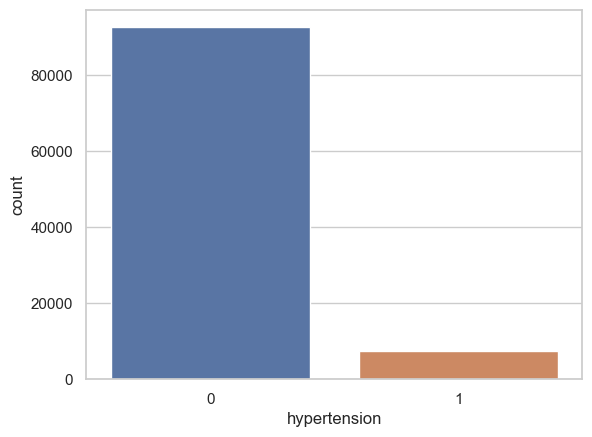

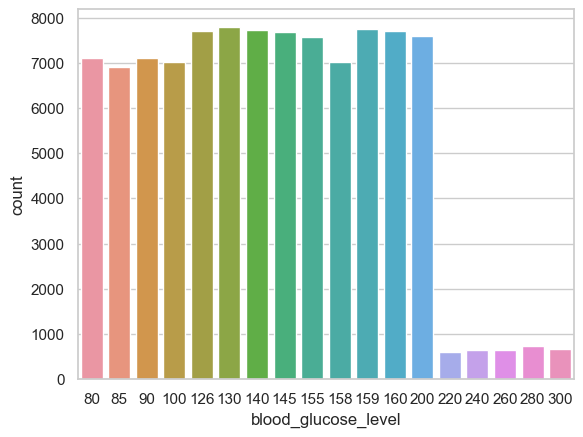

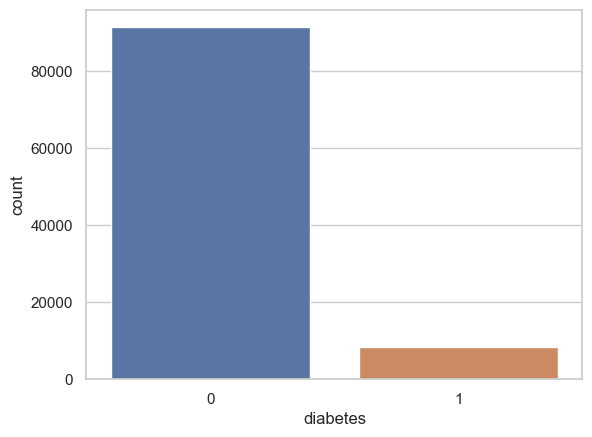

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


categorical_attrs = ['hypertension', 'blood_glucose_level', 'diabetes']
for attr in categorical_attrs:
    sns.countplot(x=df[attr])
    plt.show()

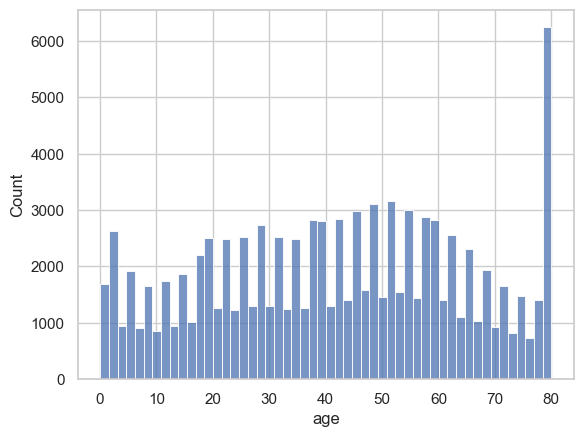

In [8]:
sns.histplot(data=df, x="age")
plt.show()

In [9]:
df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [10]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [11]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [12]:

sub_df = df[["gender", "smoking_history"]]

# Khởi tạo và fit OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(sub_df.values)

# Chuyển đổi các giá trị thành số
transformed_values = encoder.transform(sub_df.values)

# Cập nhật các cột "Name", "Age" và "Gender" trong DataFrame gốc với các giá trị đã chuyển đổi
df[["gender", "smoking_history"]] = transformed_values

# In DataFrame sau khi đã cập nhật
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,0.0,27.32,6.2,90,0
99996,0.0,2.0,0,0,0.0,17.37,6.5,100,0
99997,1.0,66.0,0,0,3.0,27.83,5.7,155,0
99998,0.0,24.0,0,0,4.0,35.42,4.0,100,0


In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [14]:
trans = MinMaxScaler()
data = trans.fit_transform(df)
dataset = pd.DataFrame(data,columns=df.columns)
dataset.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.207330,0.523096,0.07485,0.039420,0.435930,0.202040,0.368638,0.263900,0.085000
std,0.246515,0.281742,0.26315,0.194593,0.377932,0.077460,0.194668,0.185037,0.278883
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.299299,0.00000,0.000000,0.000000,0.158964,0.236364,0.090909,0.000000
50%,0.000000,0.537037,0.00000,0.000000,0.600000,0.202031,0.418182,0.272727,0.000000
75%,0.500000,0.749750,0.00000,0.000000,0.800000,0.228408,0.490909,0.359091,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4.Trích chọn đặc trưng

In [15]:
correlation_matrix = dataset.corr()
correlation_matrix

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


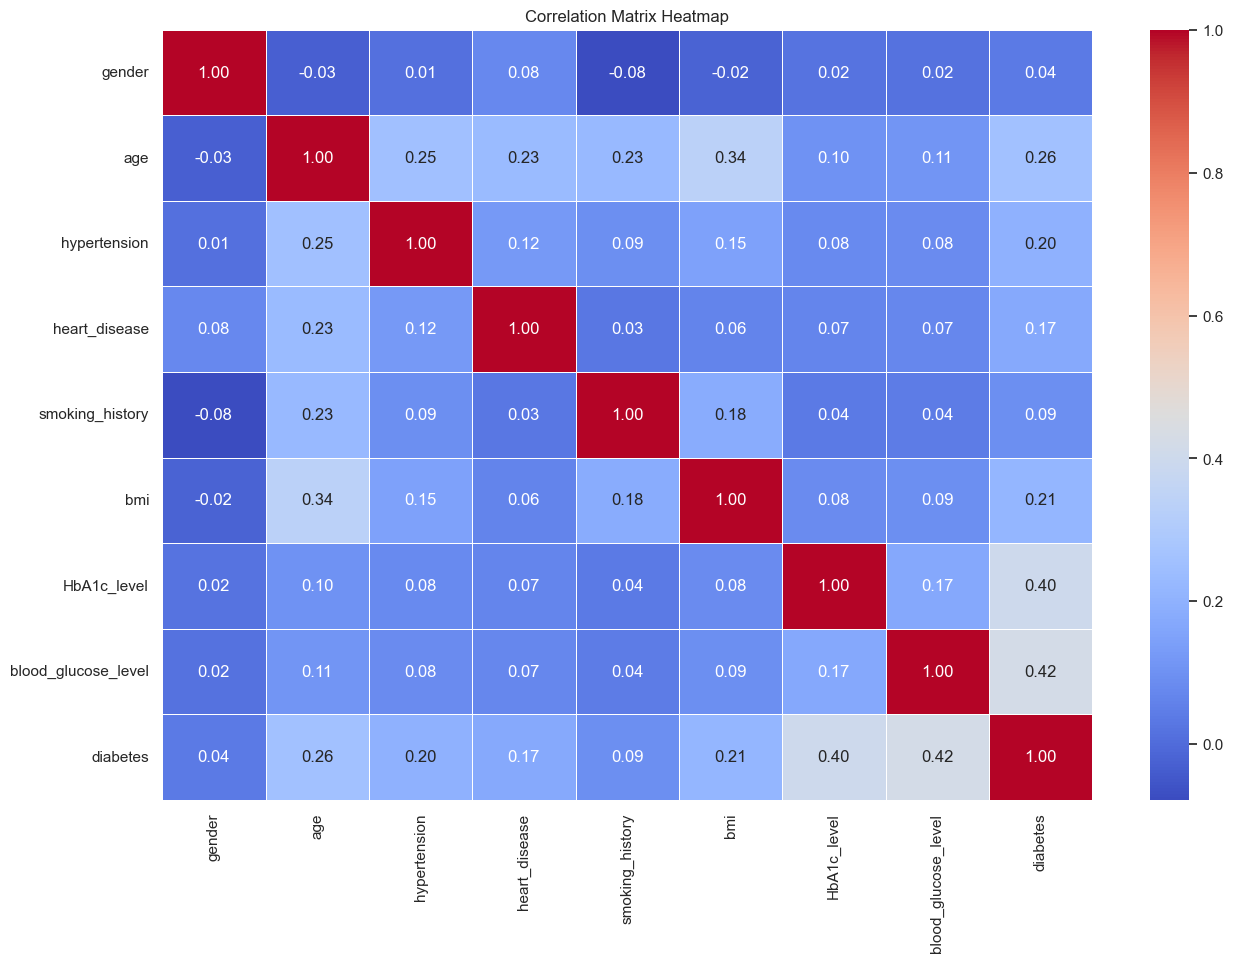

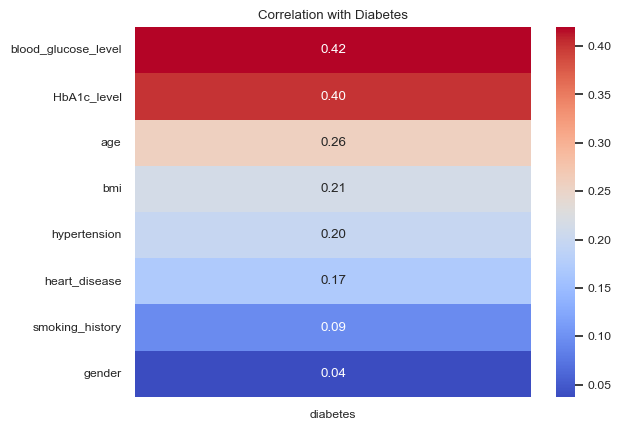

In [16]:

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


corr = dataset.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [17]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.8,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.8,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.2,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.2,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99995,0.0,1.000000,0.0,0.0,0.0,0.202031,0.490909,0.045455,0.0
99996,0.0,0.024024,0.0,0.0,0.0,0.085901,0.545455,0.090909,0.0
99997,0.5,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,0.0,0.299299,0.0,0.0,0.8,0.296569,0.090909,0.090909,0.0


In [18]:
# X = df_without_outlier.drop(labels = ['diabetes'], axis = 1).values
# y = df_without_outlier.diabetes
X = dataset.drop("diabetes",axis=1)
y = dataset.diabetes

5. Xây dựng mô hình

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) # 20 % train 

In [20]:
model_LR = LogisticRegression()
model_RF = RandomForestClassifier(random_state=13)
model_NB = GaussianNB()
model_SVM = SVC()

6.Huấn luyện mô hình

In [21]:
model_LR = model_LR.fit(X_train, y_train)
model_LR

LogisticRegression()

In [22]:
model_NB = model_NB.fit(X_train,y_train)
model_NB

GaussianNB()

In [23]:
model_RF = model_RF.fit(X_train,y_train )
model_RF

RandomForestClassifier(random_state=13)

In [24]:
model_SVM = model_SVM.fit(X_train,y_train)
model_SVM

KeyboardInterrupt: 

8.Đánh giá mô hình

     8.1.Logistic Regression

In [ ]:
pred_LR = model_LR.predict(X_test)

In [ ]:
accuracy_logreg = metrics.accuracy_score(y_test, pred_LR)
print("Accuracy of Logistic Regression:", accuracy_logreg)


Accuracy of Logistic Regression: 0.9595


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_LR)
cnf_matrix

array([[18165,   170],
       [  640,  1025]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

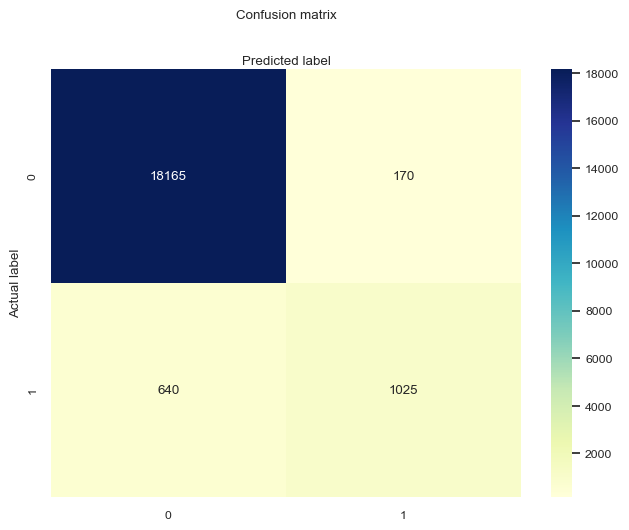

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(metrics.classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18335
         1.0       0.86      0.62      0.72      1665

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, pred_LR))
print("Precision: (Độ chuẩn xác)",metrics.precision_score(y_test, pred_LR))
print("Recall: (Độ bao phủ)",metrics.recall_score(y_test, pred_LR))

Accuracy:(Độ chính xác) 0.96015
Precision: (Độ chuẩn xác) 0.8676103247293921
Recall: (Độ bao phủ) 0.6202380952380953


     8.2.Model Naive Bayes

In [ ]:
pred_NB = model_NB.predict(X_test)

In [ ]:
accuracy_NB = metrics.accuracy_score(y_test, pred_NB)
print("Accuracy of Maive Bayes:", accuracy_NB)

Accuracy of Maive Bayes: 0.90305


In [ ]:
cnf_matrix_NB = metrics.confusion_matrix(y_test, pred_NB)
cnf_matrix_NB

array([[16996,  1339],
       [  600,  1065]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

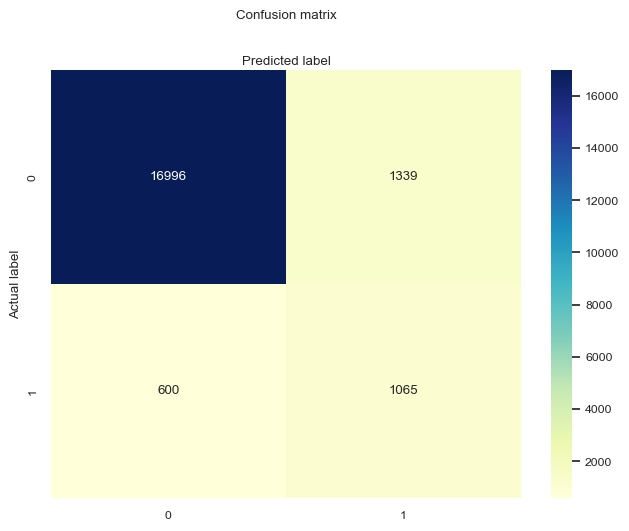

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_NB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(metrics.classification_report(y_test, pred_NB))


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     18335
         1.0       0.44      0.64      0.52      1665

    accuracy                           0.90     20000
   macro avg       0.70      0.78      0.73     20000
weighted avg       0.92      0.90      0.91     20000



In [ ]:
print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, pred_NB))
print("Precision: (Độ chuẩn xác)",metrics.precision_score(y_test, pred_NB))
print("Recall: (Độ bao phủ)",metrics.recall_score(y_test, pred_NB))

Accuracy:(Độ chính xác) 0.90305
Precision: (Độ chuẩn xác) 0.4430116472545757
Recall: (Độ bao phủ) 0.6396396396396397


     8.3.Model Random Forest

In [ ]:
pred_RF = model_RF.predict(X_test)

In [ ]:
accuracy_RF = metrics.accuracy_score(y_test, pred_RF)
print("Accuracy of Random Forest:", accuracy_RF)

Accuracy of Random Forest: 0.9712


In [ ]:
cnf_matrix_RF = metrics.confusion_matrix(y_test, pred_RF)
cnf_matrix_RF

array([[18259,    76],
       [  513,  1152]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

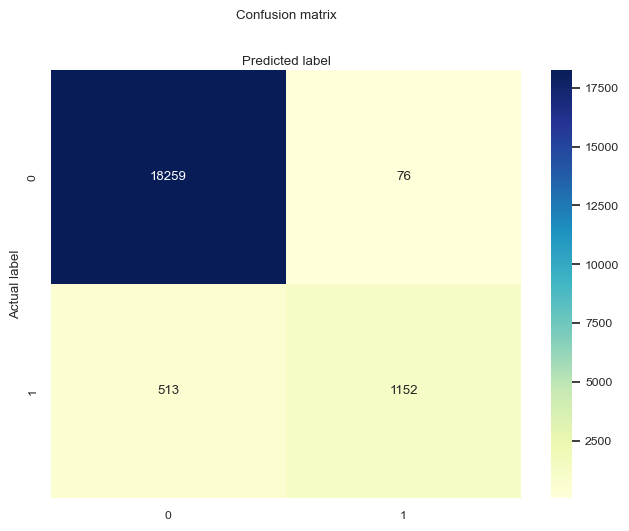

In [ ]:
lass_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(metrics.classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18335
         1.0       0.94      0.69      0.80      1665

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, pred_RF))
print("Precision: (Độ chuẩn xác)",metrics.precision_score(y_test, pred_RF))
print("Recall: (Độ bao phủ)",metrics.recall_score(y_test, pred_RF))

Accuracy:(Độ chính xác) 0.97055
Precision: (Độ chuẩn xác) 0.9381107491856677
Recall: (Độ bao phủ) 0.6918918918918919


     8.4.Model SVM

In [ ]:
pred_SVC = model_SVM.predict(X_test)

In [ ]:
accuracy_SVC = metrics.accuracy_score(y_test, pred_SVC)
print("Accuracy of Logistic Regression:", accuracy_SVC)

Accuracy of Logistic Regression: 0.9623


In [ ]:
cnf_matrix_SVC = metrics.confusion_matrix(y_test, pred_SVC)
cnf_matrix_SVC


array([[18302,    33],
       [  721,   944]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

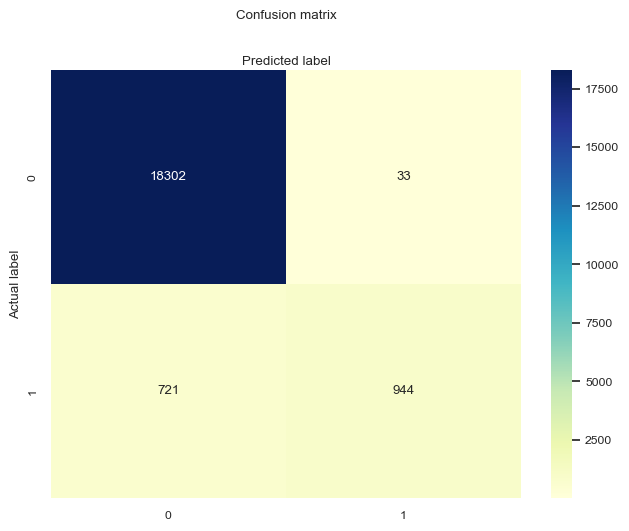

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_SVC), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(metrics.classification_report(y_test, pred_SVC))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18335
         1.0       0.97      0.57      0.71      1665

    accuracy                           0.96     20000
   macro avg       0.96      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:

print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, pred_SVC))
print("Precision: (Độ chuẩn xác)",metrics.precision_score(y_test, pred_SVC))
print("Recall: (Độ bao phủ)",metrics.recall_score(y_test, pred_SVC))

Accuracy:(Độ chính xác) 0.9623
Precision: (Độ chuẩn xác) 0.9662231320368475
Recall: (Độ bao phủ) 0.5669669669669669


In [ ]:
# evaluasi model
# 1. model LogisticRegression
akurasi_LR = metrics.accuracy_score(y_test, pred_LR)
# 2. model naive bayes
akurasi_NB = metrics.accuracy_score(y_test, pred_NB)

# 3.model Random Forest
akurasi_RF = metrics.accuracy_score(y_test, pred_RF)

# 4. model SVM
akurasi_SVM = metrics.accuracy_score(y_test, pred_SVC)

# menampilkan nilai akurasi
print('LogisticRegression :', akurasi_LR)
print('Akurasi Naive Bayes :', akurasi_NB)
print('Akurasi Random Forest :', akurasi_RF)
print('Akurasi SVM :', akurasi_SVM)

LogisticRegression : 0.96015
Akurasi Naive Bayes : 0.9045
Akurasi Random Forest : 0.97285
Akurasi SVM : 0.9636


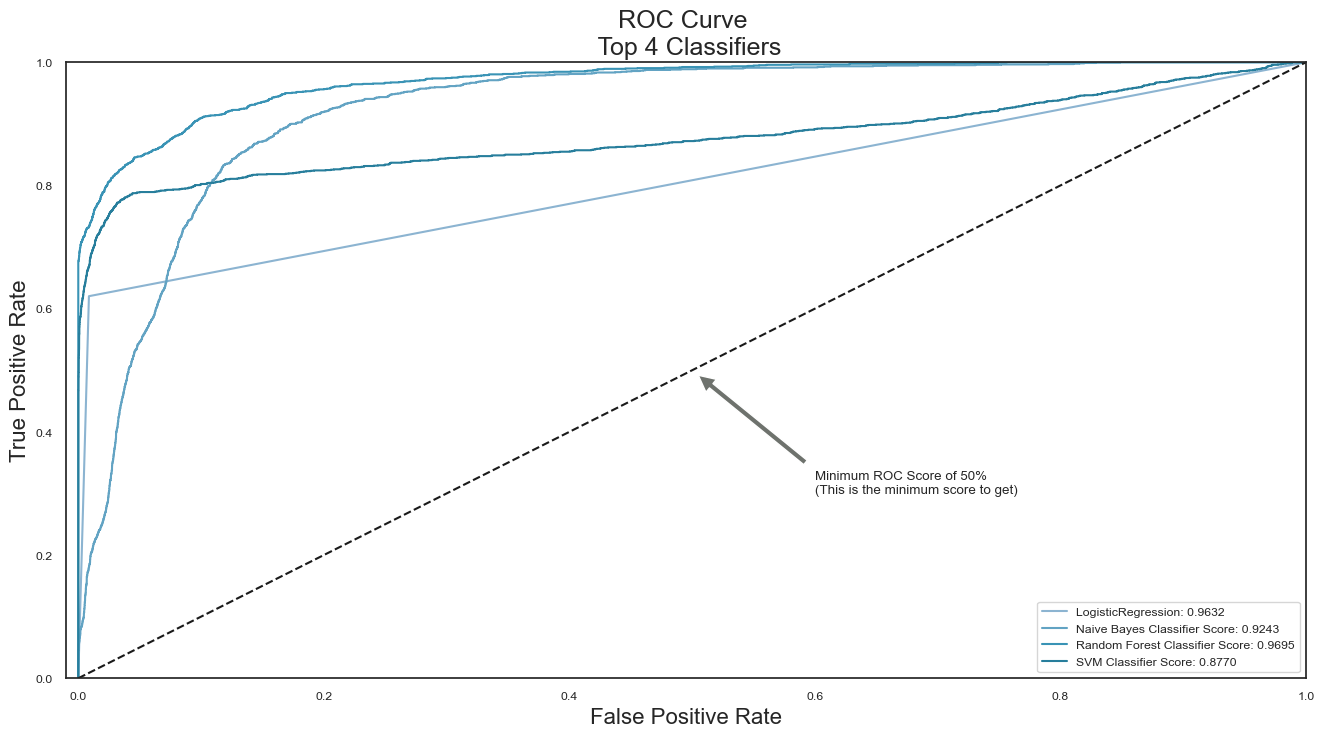

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Model LogisticRegression
pred_proba_LR = model_LR.predict_proba(X_test)[:, 1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, pred_LR)
roc_auc_LR = roc_auc_score(y_test, pred_proba_LR)

# 2. Model Naive Bayes
pred_proba_NB = model_NB.predict_proba(X_test)[:, 1]
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, pred_proba_NB)
roc_auc_NB = roc_auc_score(y_test, pred_proba_NB)

# 3. Model Random Forest
pred_proba_RF = model_RF.predict_proba(X_test)[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred_proba_RF)
roc_auc_RF = roc_auc_score(y_test, pred_proba_RF)

# 4. Model SVM
pred_proba_SVM = model_SVM.decision_function(X_test)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, pred_proba_SVM)
roc_auc_SVM = roc_auc_score(y_test, pred_proba_SVM)

# Plot ROC curves
plt.figure(figsize=(16, 8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(fpr_LR, tpr_LR, label=f'LogisticRegression: {roc_auc_LR:.4f}')
plt.plot(fpr_NB, tpr_NB, label=f'Naive Bayes Classifier Score: {roc_auc_NB:.4f}')
plt.plot(fpr_RF, tpr_RF, label=f'Random Forest Classifier Scorer Score: {roc_auc_RF:.4f}')
plt.plot(fpr_SVM, tpr_SVM, label=f'SVM Classifier Score: {roc_auc_SVM:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
plt.show()
